In [43]:
import numpy as np
# import gym
import gymnasium as gym
from matplotlib import pyplot as plt

In [14]:
env = gym.make("ALE/Assault-v5",  render_mode="human", full_action_space=False)

In [15]:
# env.metadata['render_fps'] = 30  

env.reset() # reset the environment to a new random state


print("Action Space {}". format(env.action_space))
print("State Space {}.". format(env.observation_space))

# We have 210 pixels in height and 160 pixels in width, and 3 color channels

Action Space Discrete(7)
State Space Box(0, 255, (210, 160, 3), uint8).


In [16]:
# We have 7 different actions to choose from
meaning = env.unwrapped.get_action_meanings()
print("Meaning of actions are: ", meaning)

Meaning of actions are:  ['NOOP', 'FIRE', 'UP', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']


In [41]:
obs, reward, done, truncated, info = env.step(4) # take a random action

In [ ]:
obs

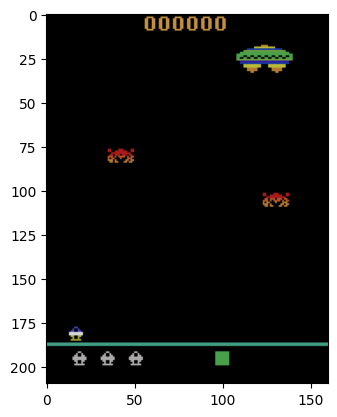

In [44]:
plt.figure()
plt.imshow(obs)

In [46]:
info

{'lives': 4, 'episode_frame_number': 100, 'frame_number': 100}

In [47]:
total_reward = 0
while True:
    obs, reward, done, truncated, info = env.step(env.action_space.sample())
    total_reward += reward
    if done:
        break
print("Total reward is {}".format(total_reward))

: 

In [19]:
# Define parameters for discretization
n_bins = 10  # Number of bins for each dimension
n_actions = env.action_space.n

# Discretize the observation space
obs_shape = (n_bins, n_bins, n_bins)
q_table_shape = obs_shape + (n_actions,)
q_table = np.zeros(q_table_shape)
q_table.shape

(10, 10, 10, 7)

In [11]:
from numpy import resize
from skimage.color import rgb2gray

# Define function to preprocess observation
def preprocess_observation(observation):
    # Convert observation to grayscale
    gray_observation = rgb2gray(observation)
    # Resize observation
    resized_observation = resize(gray_observation, (84, 84), anti_aliasing=True)
    # Scale values to range [0, 255]
    scaled_observation = resized_observation * 255
    # Discretize observation
    discretized_observation = np.round(scaled_observation / (255 / (n_bins - 1)))
    return discretized_observation.astype(np.uint8)